In [7]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [8]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

In [9]:
# 데이터 불러오기
(X_train, Y_train),(X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [10]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# 모델 최적화 설정
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [12]:
# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=2000, verbose=1, 
                    callbacks=[early_stopping_callback, checkpointer])

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 143s 2ms/step - loss: 0.8161 - acc: 0.7473 - val_loss: 0.2577 - val_acc: 0.9249

Epoch 00001: val_loss improved from inf to 0.25771, saving model to ./model/01-0.2577.hdf5
Epoch 2/30
60000/60000 [==============================] - 144s 2ms/step - loss: 0.2812 - acc: 0.9171 - val_loss: 0.1339 - val_acc: 0.9608

Epoch 00002: val_loss improved from 0.25771 to 0.13385, saving model to ./model/02-0.1339.hdf5
Epoch 3/30
60000/60000 [==============================] - 147s 2ms/step - loss: 0.1747 - acc: 0.9497 - val_loss: 0.0833 - val_acc: 0.9742

Epoch 00003: val_loss improved from 0.13385 to 0.08330, saving model to ./model/03-0.0833.hdf5
Epoch 4/30
60000/60000 [==============================] - 144s 2ms/step - loss: 0.1228 - acc: 0.9645 - val_loss: 0.0600 - val_acc: 0.9816

Epoch 00004: val_loss improved from 0.08330 to 0.06002, saving model to ./model/04-0.0600.hdf5
Epoch 5/30
60000/6

In [13]:
# 테스트 정확도 출력
print('Test Accuracy: %.4f' % (model.evaluate(X_test, Y_test)[1]))

10000/10000 [==============================] - 7s 673us/step
Test Accuracy: 0.9910


In [14]:
import matplotlib.pyplot as plt

# 테스트셋의 오차
y_vloss = history.history['val_loss']
# 학습셋의 오차
y_loss = history.history['loss']

Text(0, 0.5, 'loss')

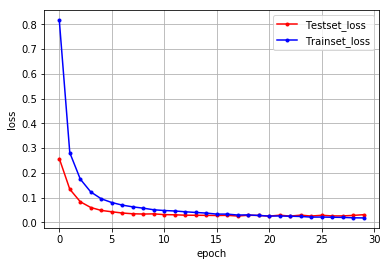

In [15]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그리드와 레이블
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')